In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 'dataset2',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
)


Found 6486 files belonging to 4 classes.


In [4]:
class_names=images_dataset.class_names
class_names



['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [5]:
len(images_dataset)



203

In [6]:
#exploring the dataset
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())


(32, 256, 256, 3)
[0 2 0 0 1 1 1 0 0 3 1 2 3 1 0 0 0 2 2 2 1 0 1 2 1 0 1 1 2 1 0 0]


In [7]:
#print first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())


[[[119. 113. 123.]
  [114. 108. 118.]
  [115. 109. 119.]
  ...
  [142. 136. 146.]
  [132. 126. 136.]
  [136. 130. 140.]]

 [[106. 100. 110.]
  [109. 103. 113.]
  [118. 112. 122.]
  ...
  [143. 137. 147.]
  [134. 128. 138.]
  [140. 134. 144.]]

 [[102.  96. 106.]
  [107. 101. 111.]
  [118. 112. 122.]
  ...
  [143. 137. 147.]
  [137. 131. 141.]
  [146. 140. 150.]]

 ...

 [[ 88.  85.  92.]
  [ 91.  88.  95.]
  [ 91.  88.  95.]
  ...
  [ 95.  92. 101.]
  [ 96.  93. 102.]
  [ 97.  94. 103.]]

 [[ 86.  83.  90.]
  [ 89.  86.  93.]
  [ 88.  85.  92.]
  ...
  [ 98.  95. 104.]
  [100.  97. 106.]
  [102.  99. 108.]]

 [[ 80.  77.  84.]
  [ 84.  81.  88.]
  [ 84.  81.  88.]
  ...
  [ 95.  92. 101.]
  [ 98.  95. 104.]
  [100.  97. 106.]]]


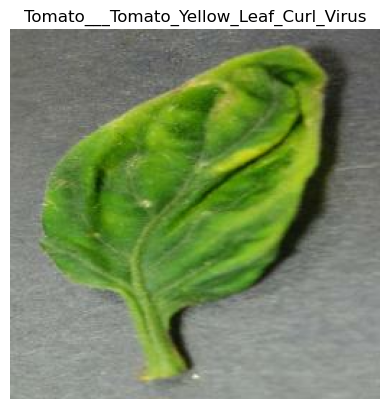

In [8]:
#visualize the first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')


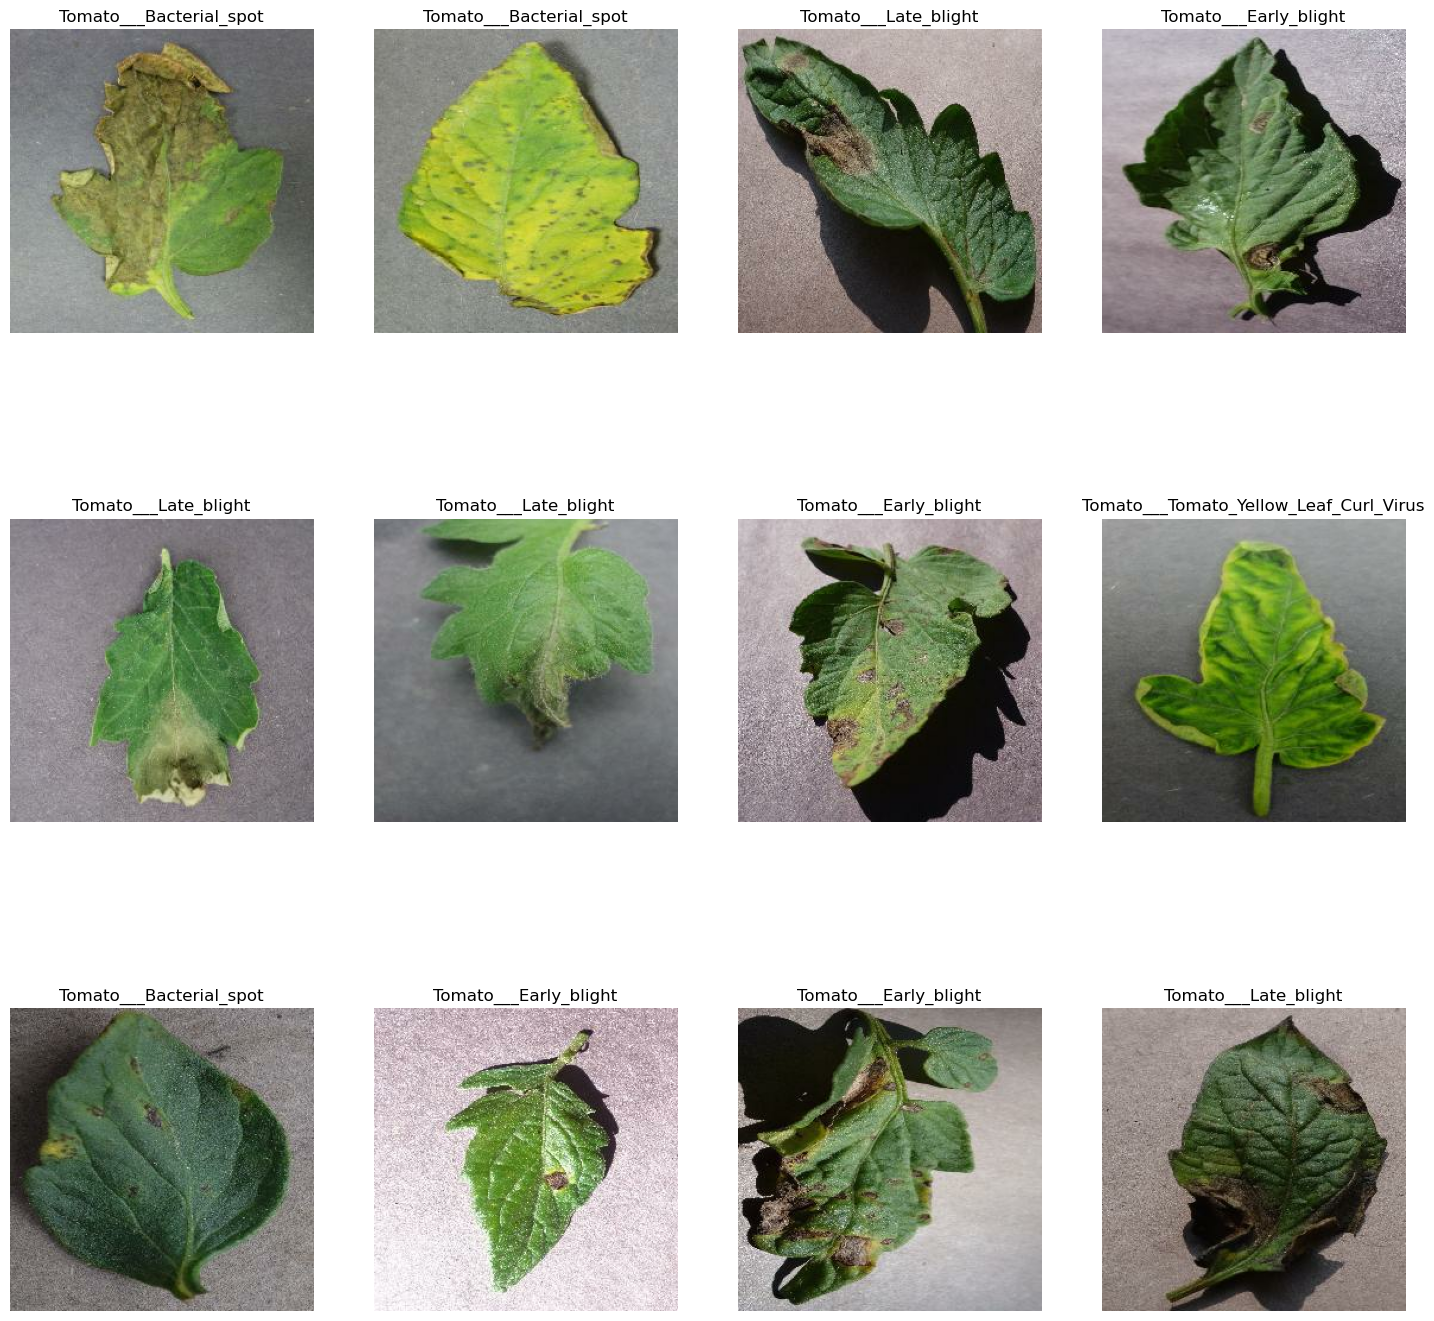

In [9]:
#visualize the first image in that batch
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [10]:
len(images_dataset)




203

In [11]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size= int(train_split* ds_size)
    val_size=int(val_split* ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)

    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)


In [13]:
print(len(train_ds),len(val_ds),len(test_ds))


162 20 21


In [14]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [15]:
resize_and_rescale=tf.keras.Sequential([

    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [16]:
data_augmentation=tf.keras.Sequential([

    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [17]:
#building the model
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=4
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(n_classes, activation='softmax')

])
model.build(input_shape=input_shape)


In [18]:
#get the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [19]:
#compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
#train the network with the given inputs and the corresponding labels
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
162/162 [==============================] - 99s 443ms/step - loss: 0.9730 - accuracy: 0.5593 - val_loss: 1.0065 - val_accuracy: 0.6125
Epoch 2/50
162/162 [==============================] - 48s 293ms/step - loss: 0.6125 - accuracy: 0.7455 - val_loss: 0.8401 - val_accuracy: 0.6656
Epoch 3/50
162/162 [==============================] - 37s 226ms/step - loss: 0.5181 - accuracy: 0.7899 - val_loss: 0.6980 - val_accuracy: 0.6969
Epoch 4/50
162/162 [==============================] - 38s 233ms/step - loss: 0.4384 - accuracy: 0.8235 - val_loss: 0.5850 - val_accuracy: 0.7797
Epoch 5/50
162/162 [==============================] - 38s 234ms/step - loss: 0.3844 - accuracy: 0.8496 - val_loss: 0.6361 - val_accuracy: 0.7391
Epoch 6/50
162/162 [==============================] - 39s 243ms/step - loss: 0.3585 - accuracy: 0.8608 - val_loss: 0.7165 - val_accuracy: 0.7484
Epoch 7/50
162/162 [==============================] - 39s 239ms/step - loss: 0.3057 - accuracy: 0.8773 - val_loss: 0.5491 - val_ac

In [21]:
#evaluate the model
scores = model.evaluate(test_ds)

21/21 [==============================] - 9s 42ms/step - loss: 0.2080 - accuracy: 0.9271


In [22]:
scores

[0.20802459120750427, 0.9270833134651184]

In [23]:
history


In [24]:
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 162}


In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [26]:
len(history.history['accuracy'])

50

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

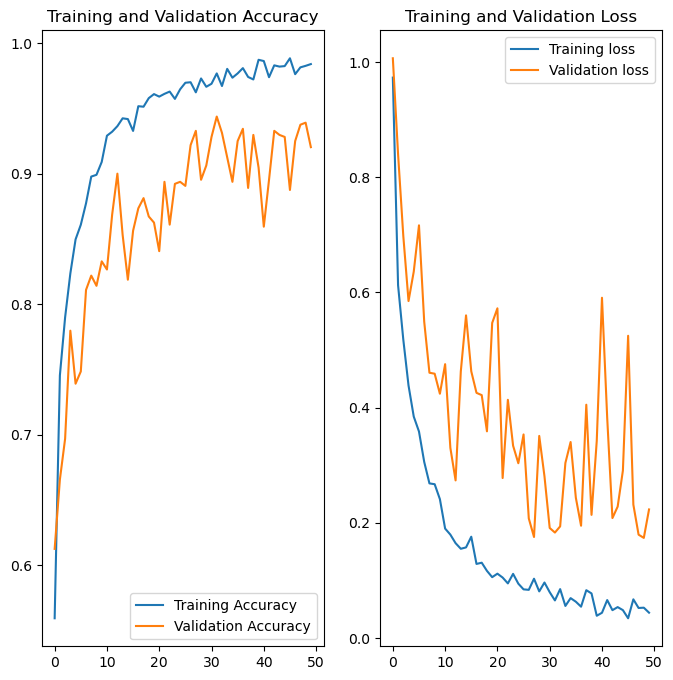

In [28]:
#Plotting Accuracy and Loss Graph for Trained Model using Matplotlib with History callback
#plotting training and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range (EPOCHS), acc, label='Training Accuracy')
plt.plot(range (EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#ploting training and validation Loss
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


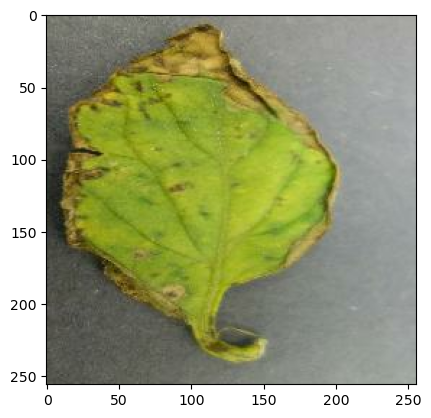

In [29]:
for images_batch, label_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

predicting the first image
image1 true label: Tomato___Early_blight
1/1 [==============================] - 1s 1s/step
image1's predict label: Tomato___Early_blight


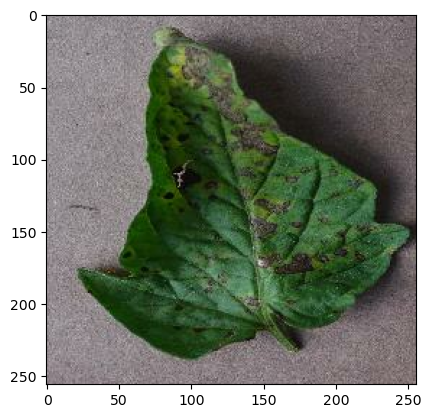

In [30]:
for images_batch, label_batch in test_ds.take(1):
    image1 = images_batch[0].numpy().astype('uint8')
    label1=label_batch[0].numpy()

    print("predicting the first image")
    plt.imshow(image1)
    print("image1 true label:", class_names[label1])
    batch_prediction = model.predict(images_batch)
    print("image1's predict label:", class_names[np.argmax(batch_prediction[0])])


In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions= model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.argmax(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 16ms/step


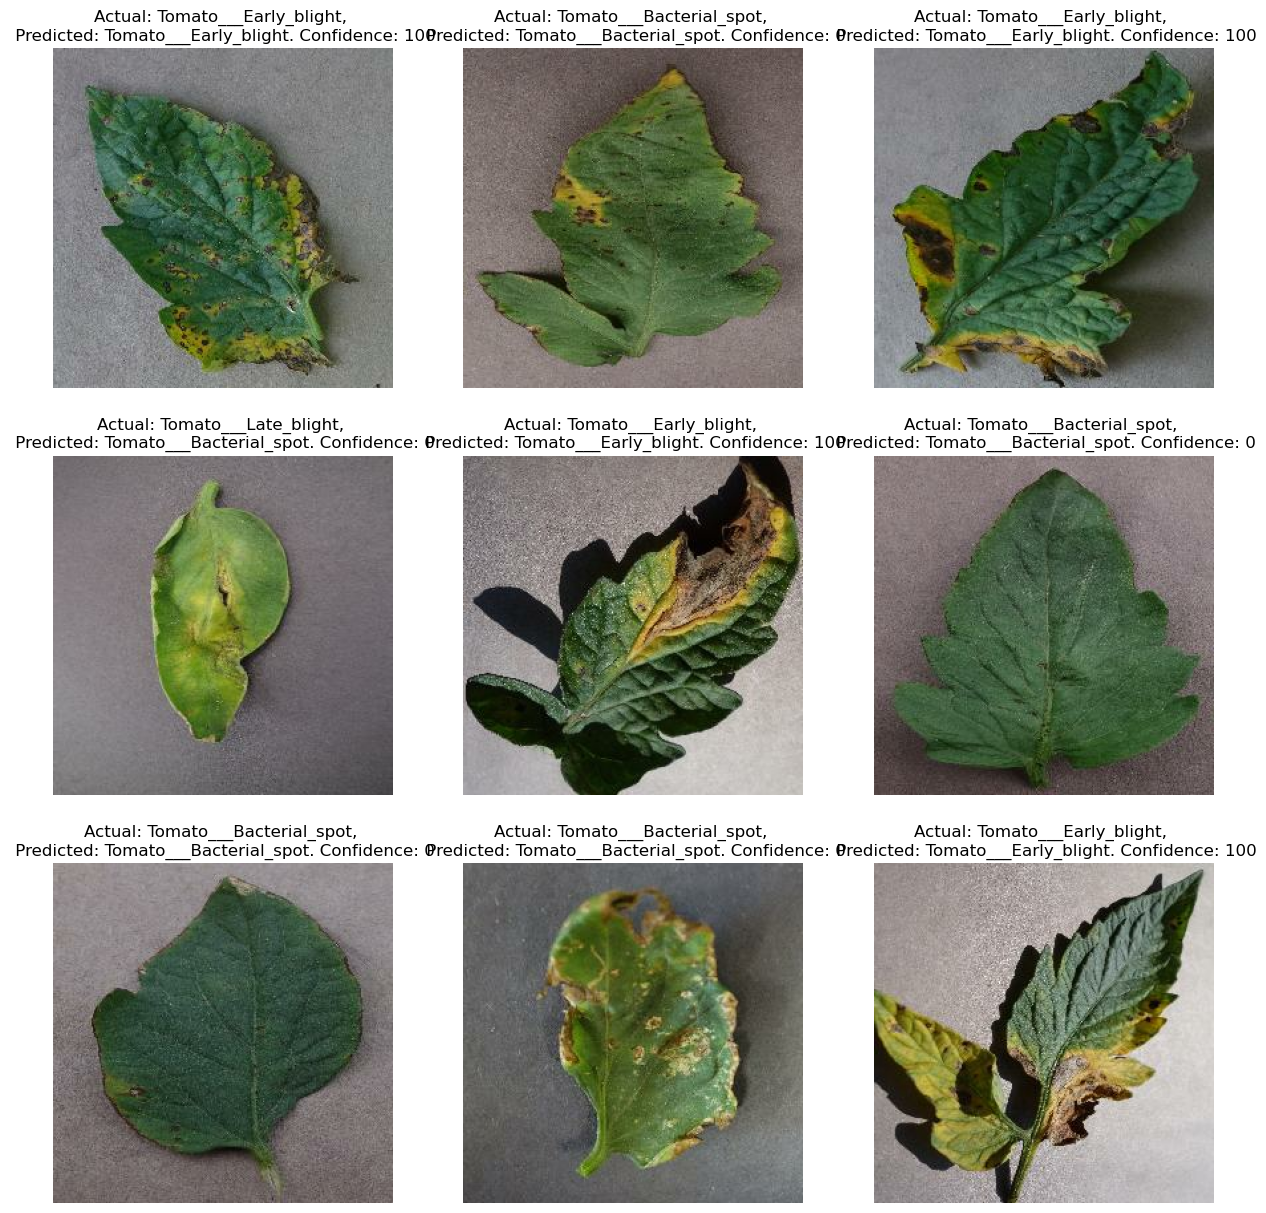

In [33]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. Confidence: {confidence}")
        plt.axis("off")

In [ ]:
model.save('laslastest.keras')

In [ ]:
# model.save('tomatoes_model.keras')
# keras.saving.save_model(model, 'my_model.keras')

In [ ]:
# from keras.models import model_from_json

# # Assuming you already have a model
# model_json = model.to_json()

# # Save the JSON to a file
# with open('tomatoes_model.json', 'w') as json_file:
#     json_file.write(model_json)



In [ ]:
model.save('laslastest.h5')

In [ ]:
from PIL import Image

In [ ]:
folder_path = 'dataset2'


In [ ]:
import os

image_path = os.path.join(folder_path,'R.jpg')